In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
cle=[]
for year in range(1903, 2015):
    season={}
    year_str=str(year)
    df=pd.read_csv('MLB/MLB_'+year_str+'.csv')
    season['year']=year
    season['W']=int(df[df['Tm']=='CLE']['W'])
    season['L']=int(df[df['Tm']=='CLE']['L'])
    season['Rk']=int(df[df['Tm']=='CLE']['Rk'])
    season['W-L%']=float(df[df['Tm']=='CLE']['W-L%'])
    cle.append(season)

In [62]:
df=pd.DataFrame(cle)

In [63]:
len(df)

112

In [64]:
df.head()

,L,Rk,W,W-L%,year
0,63,6,77,0.550,1903
1,65,7,86,0.570,1904
2,78,10,76,0.493,1905
3,64,6,89,0.582,1906
4,67,7,85,0.559,1907


In [65]:
df.index=df['year']

In [66]:
df.head()

,L,Rk,W,W-L%,year
year,,,,,
1903,63,6,77,0.550,1903
1904,65,7,86,0.570,1904
1905,78,10,76,0.493,1905
1906,64,6,89,0.582,1906
1907,67,7,85,0.559,1907


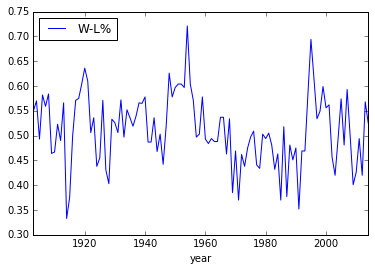

In [67]:
ax=df.plot(x='year', y='W-L%')

In [69]:
misery=[]
total_misery=0
for row in df['W-L%']:
    if row>=0.7:
        total_misery-=1
        misery.append(total_misery)
    elif row>=0.55:
        total_misery-=0.5
        misery.append(total_misery)
    elif row>=0.4:
        total_misery+=0.5
        misery.append(total_misery)
    else:
        total_misery+=1
        misery.append(total_misery)
df['misery']=misery

In [70]:
df.head()

,L,Rk,W,W-L%,year,misery
year,,,,,,
1903,63,6,77,0.550,1903,-0.5
1904,65,7,86,0.570,1904,-1.0
1905,78,10,76,0.493,1905,-0.5
1906,64,6,89,0.582,1906,-1.0
1907,67,7,85,0.559,1907,-1.5


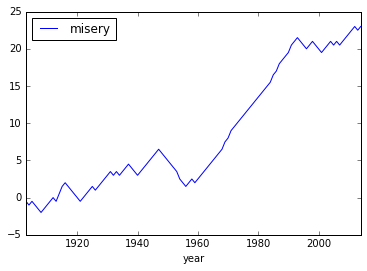

In [71]:
df.plot(x='year', y='misery')